# Day 37 — Segment Analysis
Using best_selling_video_games.csv

## Kaggle Setup
Add dataset and update file path below.

In [32]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_theme(style="whitegrid")

df = pd.read_csv("/kaggle/input/datasets/vishardmehta/most-selling-video-games-dataset/best_selling_video_games.csv")
df.head()


,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,Multi-platform,Mojang Studios,Mojang Studios,NaN,2011[b],350,Minecraft,1
1,2,Grand Theft Auto V,Multi-platform,Rockstar North,Rockstar Games,NaN,2013,225,Grand Theft Auto,1
2,3,Wii Sports[a],Wii,Nintendo EAD,Nintendo,NaN,2006,82.9,Wii,1
3,4,Red Dead Redemption 2,Multi-platform,Rockstar Games,Rockstar Games,NaN,2018,82,Red Dead,1
4,5,Mario Kart 8/Deluxe,Wii U/Switch,Nintendo EAD/Nintendo EPD(Deluxe),Nintendo,[c],2014,79.05,Mario Kart,1


# Clean release year

In [33]:
df["Releaseyear"] = df["Releaseyear"].astype(str)
df["Releaseyear"] = df["Releaseyear"].str.extract(r"(\d{4})")
df["Releaseyear"] = pd.to_numeric(df["Releaseyear"], errors="coerce")
df

,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,Multi-platform,Mojang Studios,Mojang Studios,NaN,2011.0,350,Minecraft,1
1,2,Grand Theft Auto V,Multi-platform,Rockstar North,Rockstar Games,NaN,2013.0,225,Grand Theft Auto,1
2,3,Wii Sports[a],Wii,Nintendo EAD,Nintendo,NaN,2006.0,82.9,Wii,1
3,4,Red Dead Redemption 2,Multi-platform,Rockstar Games,Rockstar Games,NaN,2018.0,82,Red Dead,1
4,5,Mario Kart 8/Deluxe,Wii U/Switch,Nintendo EAD/Nintendo EPD(Deluxe),Nintendo,[c],2014.0,79.05,Mario Kart,1
5,6,PUBG: Battlegrounds,Multi-platform,PUBG Studios,Krafton,NaN,2017.0,75,PUBG Universe,1
6,7,Terraria,Multi-platform,Re-Logic,Re-Logic/505 Games,NaN,2011.0,64,NaN,1
7,8,The Witcher 3: Wild Hunt,Multi-platform,CD Projekt Red,CD Projekt,NaN,2015.0,60,The Witcher,1
8,9,Super Mario Bros.[d],Multi-platform,Nintendo R&D4,Nintendo,NaN,1985.0,58,Super Mario,1
9,10,Human: Fall Flat,Multi-platform,No Brakes Games,Curve Digital,NaN,2016.0,55,NaN,1


## Convert to Datetime

In [34]:
df["Releaseyear"] = pd.to_datetime(df["Releaseyear"], format="%Y")
df = df.sort_values("Releaseyear")
df

,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
36,37,Duck Hunt[o],Famicom / NES,Nintendo R&D1,Nintendo,NaN,1984-01-01,28.3,NaN,1
8,9,Super Mario Bros.[d],Multi-platform,Nintendo R&D4,Nintendo,NaN,1985-01-01,58,Super Mario,1
24,25,Tetris(Game Boy)[k],Game Boy,Nintendo R&D1,Nintendo,NaN,1989-01-01,35,Tetris,1
14,15,Pokémon Red/Blue/Yellow,Multi-platform,Game Freak,Nintendo,[e],1996-01-01,47.44,Pokémon,1
30,31,Pokémon Gold/Silver/Crystal,Game Boy Color,Game Freak,Nintendo,[m],1999-01-01,30.12,Pokémon,1
40,41,Grand Theft Auto: San Andreas,Multi-platform,Rockstar North,Rockstar Games,NaN,2004-01-01,27.5,Grand Theft Auto,1
38,39,Wii Play[p],Wii,Nintendo EAD,Nintendo,NaN,2006-01-01,28.02,Wii,1
27,28,New Super Mario Bros.,Nintendo DS,Nintendo EAD,Nintendo,NaN,2006-01-01,30.8,Super Mario,1
48,49,Garry's Mod,PC,Facepunch Studios,Valve,NaN,2006-01-01,25.56,NaN,1
49,50,Pokémon Diamond/Pearl/Platinum,Nintendo DS,Game Freak,Nintendo/The Pokémon Company,[t],2006-01-01,25.5,Pokémon,1


## Aggregate yearly sales

In [35]:
yearly_sales = (
    df.groupby("Releaseyear")["Sales(millions)"]
    .sum()
)

yearly_sales.head()

Releaseyear
1984-01-01     28.3
1985-01-01       58
1989-01-01       35
1996-01-01    47.44
1999-01-01    30.12
Name: Sales(millions), dtype: object

## Plot time trend

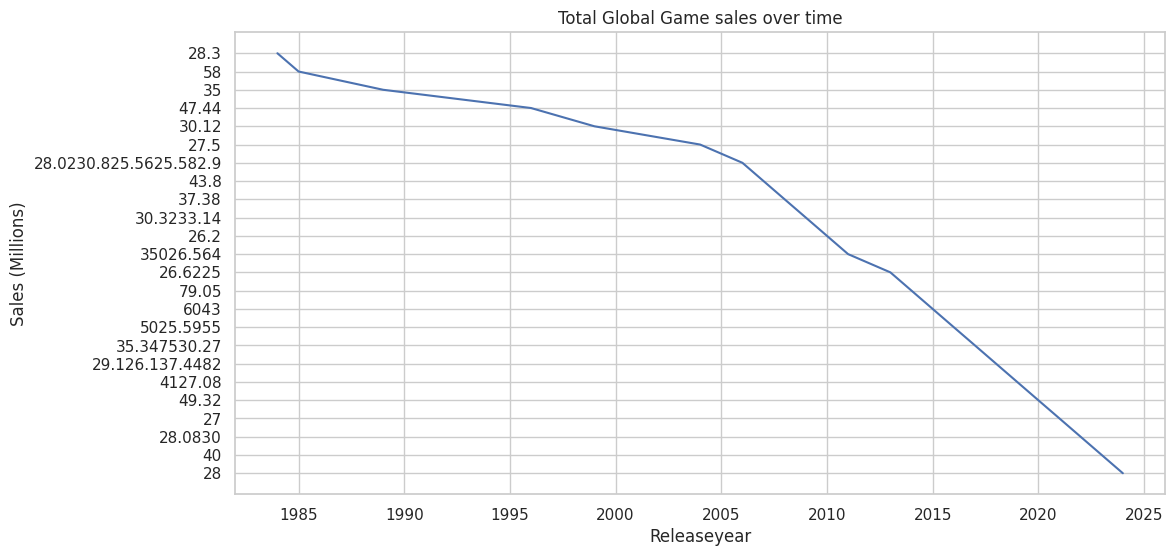

In [36]:

plt.figure(figsize = (12,6))
sns.lineplot(x=yearly_sales.index, y= yearly_sales.values)
plt.title("Total Global Game sales over time")
plt.ylabel("Sales (Millions)")
plt.show()

## Decompostion time series

/tmp/ipykernel_55/1244025111.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yearly_sales = yearly_sales.fillna(0)


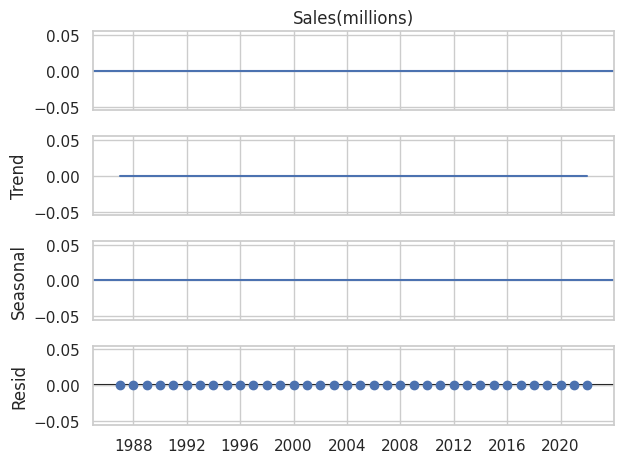

In [37]:
yearly_sales.index = pd.to_datetime(yearly_sales.index)
yearly_sales = yearly_sales.asfreq("YE")
yearly_sales = yearly_sales.fillna(0)


result = seasonal_decompose(yearly_sales, model = "additive", period = 5)
result.plot()
plt.show()